In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

2023-07-05 13:22:27.027715: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-05 13:22:27.029173: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 13:22:27.056764: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 13:22:27.057300: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 13:22:27.535201: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
df = pd.read_csv('./employee-attrition.csv')
df.shape

(1470, 35)

In [9]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
437,30,No,Travel_Rarely,413,Sales,7,1,Marketing,1,585,4,Male,57,3,1,Sales Representative,2,Single,2983,18398,0,Y,No,14,3,1,80,0,4,3,3,3,2,1,2
832,37,No,Travel_Rarely,367,Research & Development,25,2,Medical,1,1161,3,Female,52,2,2,Healthcare Representative,4,Divorced,5731,17171,7,Y,No,13,3,3,80,2,9,2,3,6,2,1,3
1280,37,No,Travel_Rarely,1239,Human Resources,8,2,Other,1,1794,3,Male,89,3,2,Human Resources,2,Divorced,4071,12832,2,Y,No,13,3,3,80,0,19,4,2,10,0,4,7
261,38,No,Non-Travel,1327,Sales,2,2,Life Sciences,1,361,4,Male,39,2,2,Sales Executive,4,Married,5249,19682,3,Y,No,18,3,4,80,1,13,0,3,8,7,7,5
425,50,No,Travel_Rarely,1099,Research & Development,29,4,Life Sciences,1,569,2,Male,88,2,4,Manager,3,Married,17046,9314,0,Y,No,15,3,2,80,1,28,2,3,27,10,15,7
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0
718,45,No,Non-Travel,248,Research & Development,23,2,Life Sciences,1,1002,4,Male,42,3,2,Laboratory Technician,1,Married,3633,14039,1,Y,Yes,15,3,3,80,1,9,2,3,9,8,0,8
1245,24,No,Travel_Frequently,897,Human Resources,10,3,Medical,1,1746,1,Male,59,3,1,Human Resources,4,Married,2145,2097,0,Y,No,14,3,4,80,1,3,2,3,2,2,2,1
284,26,No,Travel_Frequently,496,Research & Development,11,2,Medical,1,390,1,Male,60,3,2,Healthcare Representative,1,Married,4741,22722,1,Y,Yes,13,3,3,80,1,5,3,3,5,3,3,3
1338,30,Yes,Travel_Rarely,945,Sales,9,3,Medical,1,1876,2,Male,89,3,1,Sales Representative,4,Single,1081,16019,1,Y,No,13,3,3,80,0,1,3,2,1,0,0,0


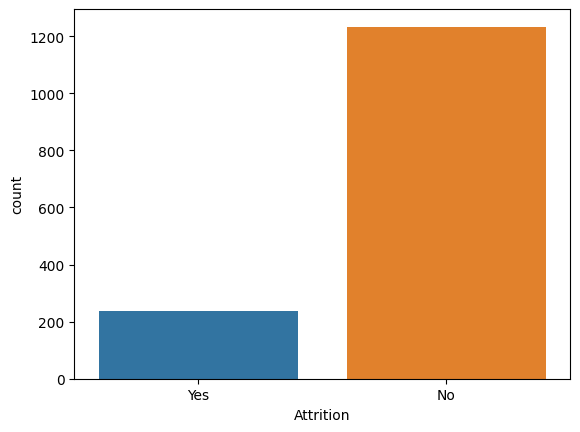

In [10]:
sns.countplot(x='Attrition', data=df);

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [12]:
df.isnull().any().any()

False

In [13]:
df = df.drop('EmployeeCount', axis=1) # removing EmployeeCount from numerical columns
df = df.drop('StandardHours', axis=1)

In [14]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
443,Yes,Travel_Frequently,Research & Development,Technical Degree,Male,Laboratory Technician,Single,Y,No
926,No,Travel_Rarely,Sales,Marketing,Female,Sales Executive,Single,Y,No
846,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Divorced,Y,No
1435,No,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Y,Yes
98,No,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,Y,No


In [15]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

df = pd.get_dummies(df, columns=cols, drop_first=True)

In [16]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

In [19]:
lazy = LazyClassifier()
model, pred = lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  4.86it/s]


In [20]:
model.sort_values('Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.89,0.61,None,0.86,0.04
CalibratedClassifierCV,0.88,0.56,None,0.84,0.03
LogisticRegression,0.88,0.63,None,0.86,0.02
ExtraTreesClassifier,0.88,0.57,None,0.85,0.11
LinearSVC,0.88,0.56,None,0.84,0.11
RandomForestClassifier,0.88,0.56,None,0.84,0.21
SVC,0.87,0.54,None,0.83,0.06
RidgeClassifier,0.87,0.53,None,0.82,0.01
AdaBoostClassifier,0.87,0.65,None,0.86,0.13


[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
The optimal number of neighbors is  1 


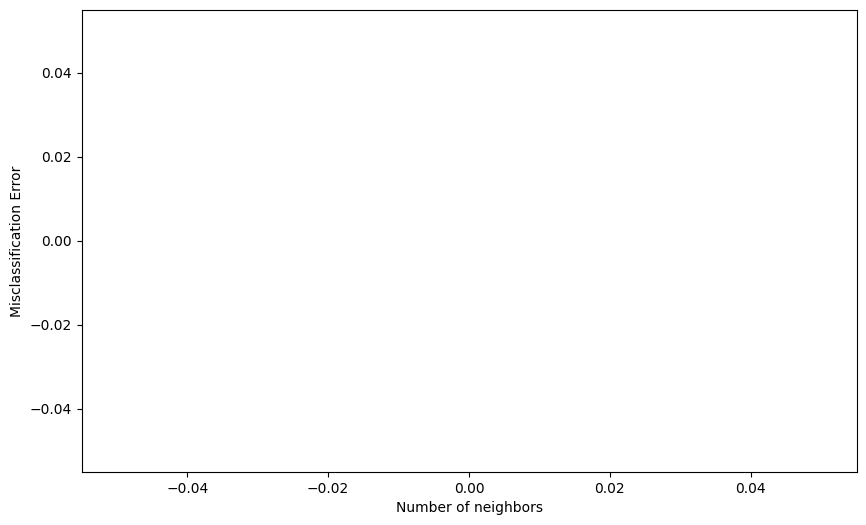

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(knn, X_train, y_train, cv = 2, scoring = 'accuracy')  
    print(scores)
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

In [35]:

from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 


Train Result:
------------


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [18]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [20]:
rfc = RandomForestClassifier(**rf_params) 
rfc.fit(X_train, y_train) 
print_score(rfc, X_train, y_train, X_test, y_test, train = True) 
print_score(rfc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       978
         Yes       1.00      0.14      0.24       198

    accuracy                           0.85      1176
   macro avg       0.93      0.57      0.58      1176
weighted avg       0.88      0.85      0.81      1176


Confusion Matrix: 
 [[978   0]
 [171  27]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0124
accuracy score: 0.8546

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294


Confusion Matrix: 
 [[255   0]
 [ 35   4]]

accuracy score: 0.881

In [21]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [22]:
gbc = GradientBoostingClassifier(**gb_params) 
gbc.fit(X_train, y_train) 
print_score(gbc, X_train, y_train, X_test, y_test, train = True) 
print_score(gbc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       978
         Yes       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[978   0]
 [  0 198]]

Average Accuracy: 	 0.8631
Accuracy SD: 		 0.0154
accuracy score: 1.0000

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.90      0.96      0.93       255
         Yes       0.57      0.33      0.42        39

    accuracy                           0.88       294
   macro avg       0.73      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294


Confusion Matrix: 
 [[245  10]
 [ 26  13]]

accuracy score: 0.877

Text(0, 0.5, 'Features')

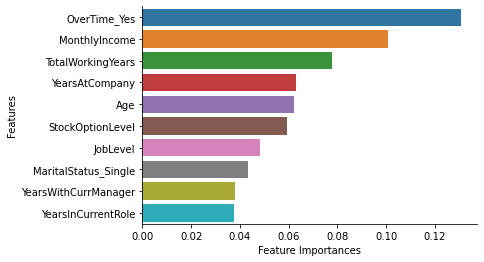

In [23]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")

# Analysis Conclusion :


### Top Reasons why Employees leave the Organization:

1. No Overtime This was a surpirse, employees who don't have overtime are most likely to leave the 
    organization. This could be that employees would like to have a higher amount of income or employees could 
    feel that they are underused.
    

2. Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for
    a better salary.
    

3. Age: This could also be expected, since people who are aiming to retire will leave the organization. 

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.



We have constructed a very simple pipeline of predicting employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing three learning models in the form of a K-Neighbors Classifier, Random Forest and a Gradient Boosting classifier. This whole notebook takes less than a minute to run and it even returns a 87% accuracy in its predictions.

That being said, there is quite a lot of room for improvement. For one, more features could be engineered from the data. Furthermore one could squeeze performance out of this pipeline by perhaps using some form of blending or stacking of models. I myself am quite keen to implement a classifier voting where a handful of classifiers votes on the outcome of the predictions and we take the majority vote.